In [1]:
import os
os.chdir("/home/.../neuvisys_analysis/")

In [2]:
%load_ext autoreload
%autoreload 2

import os
import shutil
import pprint
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from pdf2image import convert_from_path
from src.spiking_network.network.neuvisys import SpikingNetwork
from src.spiking_network.gabor2 import fit
import theano
import matplotlib.image as mpimg
from  matplotlib.colors import LinearSegmentedColormap
from fpdf import FPDF

os.chdir("/home/comsee/.../neuvisys_analysis/src/")
home = "/home/comsee/"

SMALL_SIZE = 20
MEDIUM_SIZE = 25
BIGGER_SIZE = 30

plt.rc('figure', figsize=(30, 8))
plt.rc('font', size=SMALL_SIZE)  # controls default text sizes
plt.rc('axes', titlesize=MEDIUM_SIZE,
       labelsize=MEDIUM_SIZE)  # fontsize of the axes title, fontsize of the x and y labels
plt.rc('xtick', labelsize=SMALL_SIZE)  # fontsize of the tick labels
plt.rc('ytick', labelsize=SMALL_SIZE)  # fontsize of the tick labels
plt.rc('legend', fontsize=SMALL_SIZE)  # legend fontsize

In [3]:
networks_path3 = "/home/comsee/.../data_basic_PCL_NatComms/"

In [4]:
intmax = 11
tot = 140
n_neurs = 3
nets = [networks_path3 + "net1/", networks_path3 + "net1b/", networks_path3 + "net1c/"]
wis = np.zeros((len(nets),intmax,n_neurs), dtype=np.float32)
for p, path in enumerate(nets):
    spinet = SpikingNetwork(path)
    for i in range(intmax):
        _, _, wi, _ = spinet.load_intermediate_weights(0, "SimpleCell", np.int32(i * tot))
        for j in range(len(wi)):
            if(j==0):
                continue
            else:
                wis[p,i,j-1] = wi[j][0]

/home/comsee/PhD_Antony/PCL_Python/neuvisys_analysis/src/spiking_network/network/neuvisys.py:226: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return np.array(weights), np.array(weights_local_inhib), np.array(weights_li), np.array(weights_tdi)


In [7]:
import matplotlib
matplotlib.rc('xtick', labelsize=35) 
matplotlib.rc('ytick', labelsize=35) 
matplotlib.rcParams['legend.fontsize'] = 35

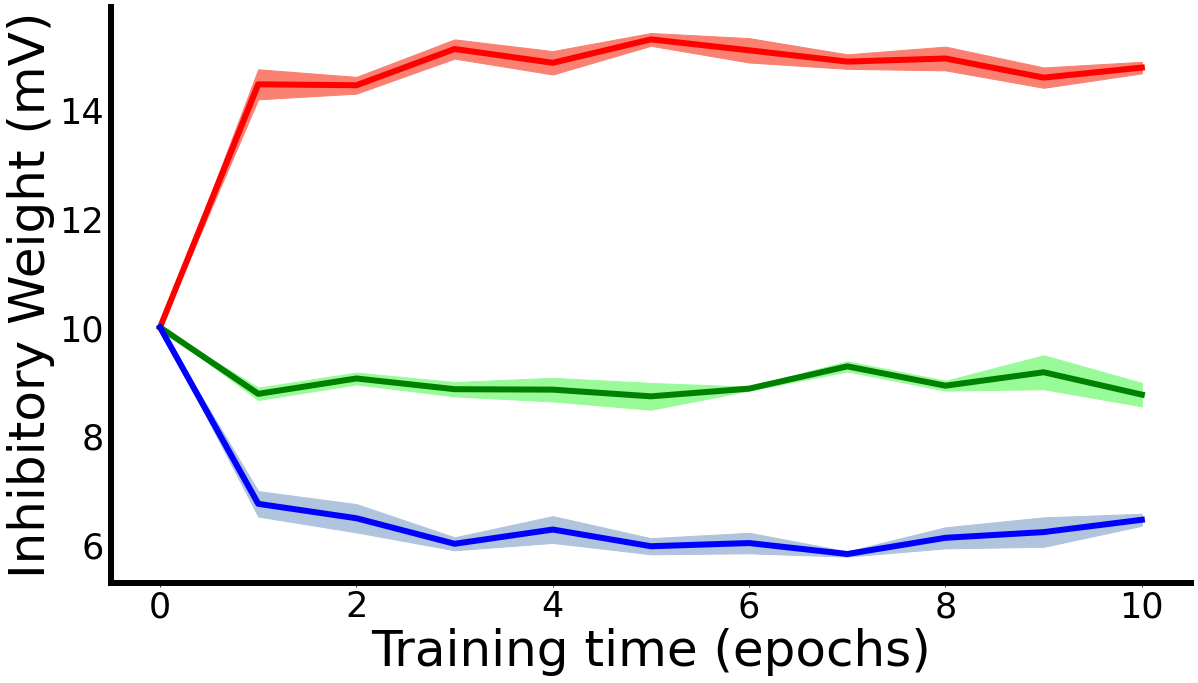

In [8]:
colors = ["red", "green", "blue"]
color_shaded = ["salmon", "palegreen", "lightsteelblue"]
f = [10, 50, 100]
fig = plt.figure(0,figsize=(15, 8))
ax = fig.add_axes([0,0,1,1])
ax.set_xlabel("Training time (epochs)", fontsize = 50)
ax.set_ylabel("Inhibitory Weight (mV)", fontsize = 50)
# ax.set_title("Norm = {}".format(f[d]))
ax.spines["bottom"].set_linewidth(6) 
ax.spines["left"].set_linewidth(6)   
ax.spines[['right', 'top']].set_visible(False)
idexes = range(11)
for e, color in enumerate(colors):
    ax.plot(idexes, mean[:,e], color = color, linewidth = 6)
    ax.fill_between(idexes, mean[:,e]-std_err[:,e], mean[:,e]+std_err[:,e], color = color_shaded[e])

In [9]:
simulation = 35
layer_id = 0
spike_trains_x = []
spike_trains_y = []
no_inhib_x = []
no_inhib_y = []
spike_input_counts = []
folder_names = ["3", "3no"]
neur_x = 4
neur_y = 1
neur_z = 1
for sim in range(simulation):
#     print("sim = {}".format(sim))
    for folder in folder_names:#[1,3]:
        spinet.load_statistics_standard(folder_name = folder, layer_id = layer_id, simulation = sim)
        train_x = []
        train_y = []
        input_counts = []
        for neuron_id in range(neur_x * neur_y * neur_z):
            for v in spinet.stats[0]['0'][layer_id][str(layer_id)][neuron_id][1]["potential_train"]:
                train_x.append(neuron_id)
                train_y.append(v[1])
        if(folder=="3"):
            spike_trains_x.append(np.array(train_x))
            spike_trains_y.append(np.array(train_y))
        else:
            no_inhib_x.append(np.array(train_x))
            no_inhib_y.append(np.array(train_y))

sim = 0
sim = 1
sim = 2
sim = 3
sim = 4
sim = 5
sim = 6
sim = 7
sim = 8
sim = 9
sim = 10
sim = 11
sim = 12
sim = 13
sim = 14
sim = 15
sim = 16
sim = 17
sim = 18
sim = 19
sim = 20
sim = 21
sim = 22
sim = 23
sim = 24
sim = 25
sim = 26
sim = 27
sim = 28
sim = 29
sim = 30
sim = 31
sim = 32
sim = 33
sim = 34


0

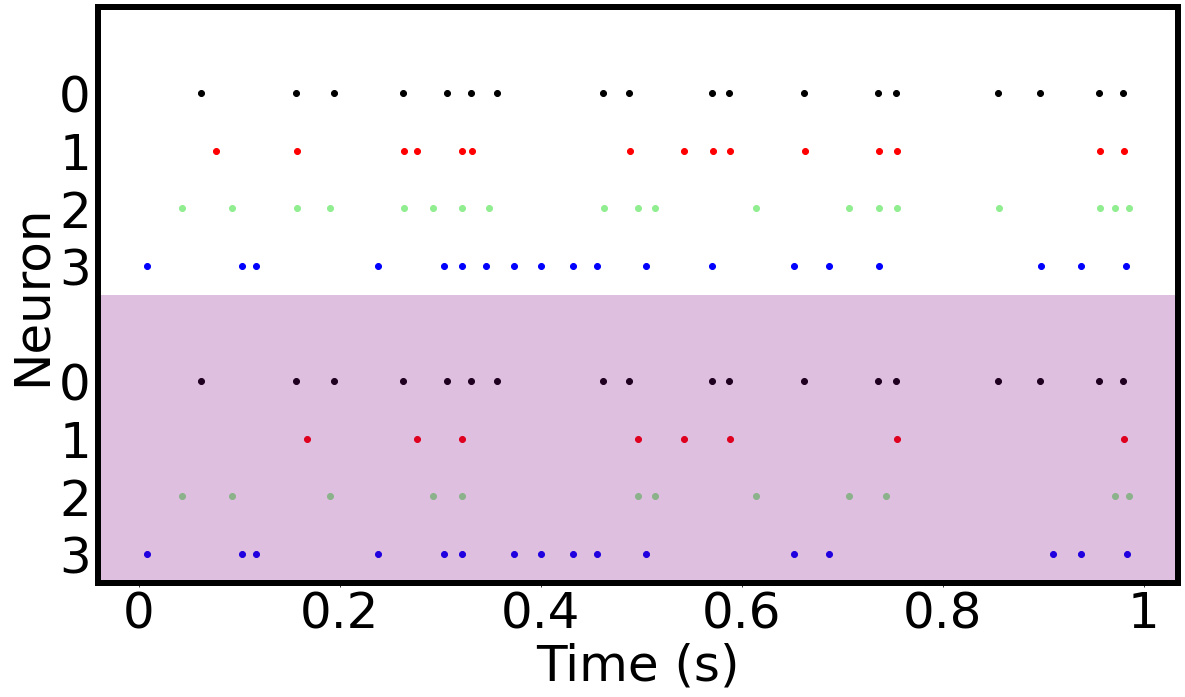

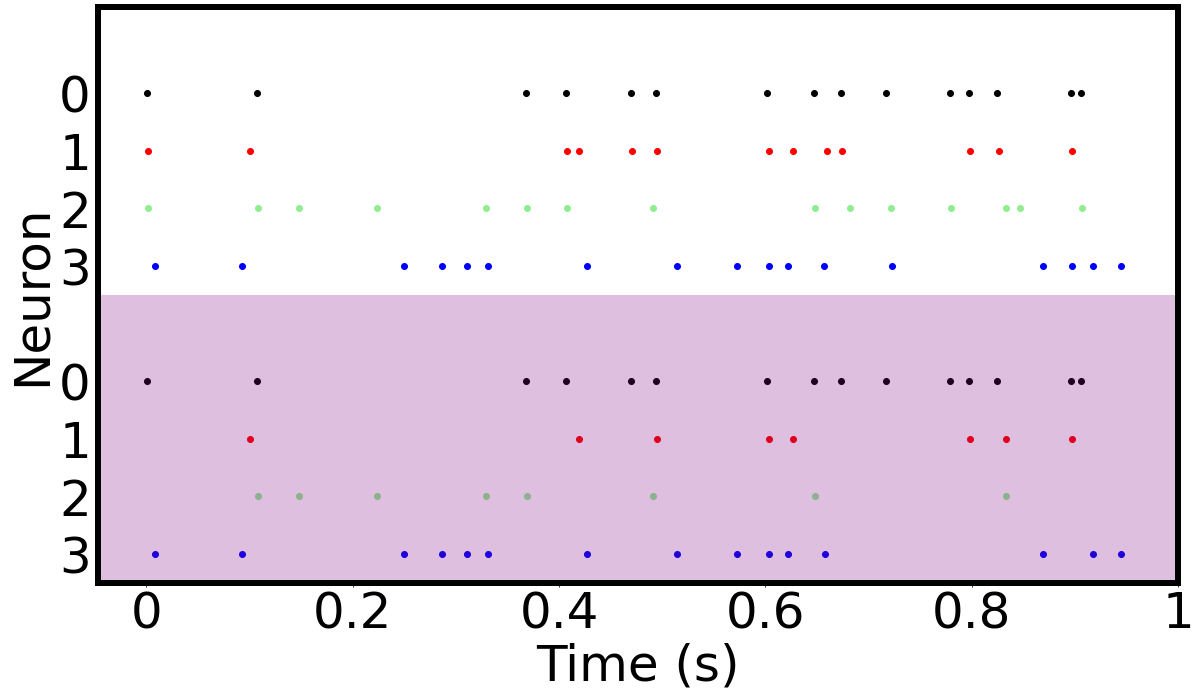

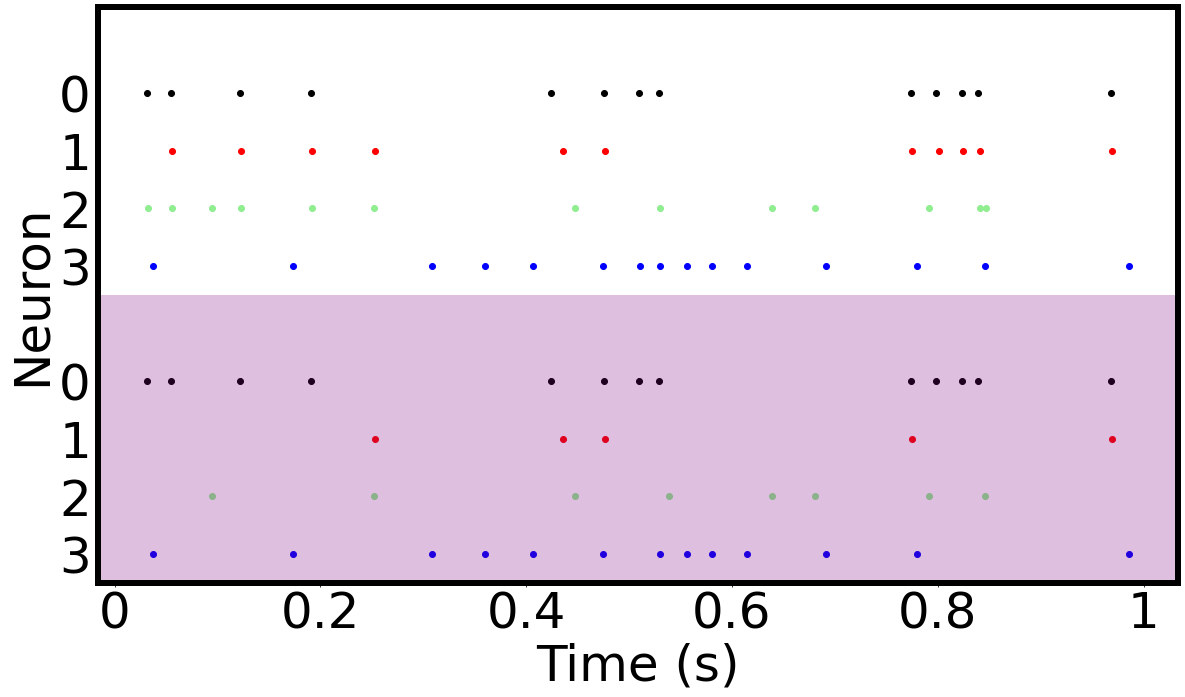

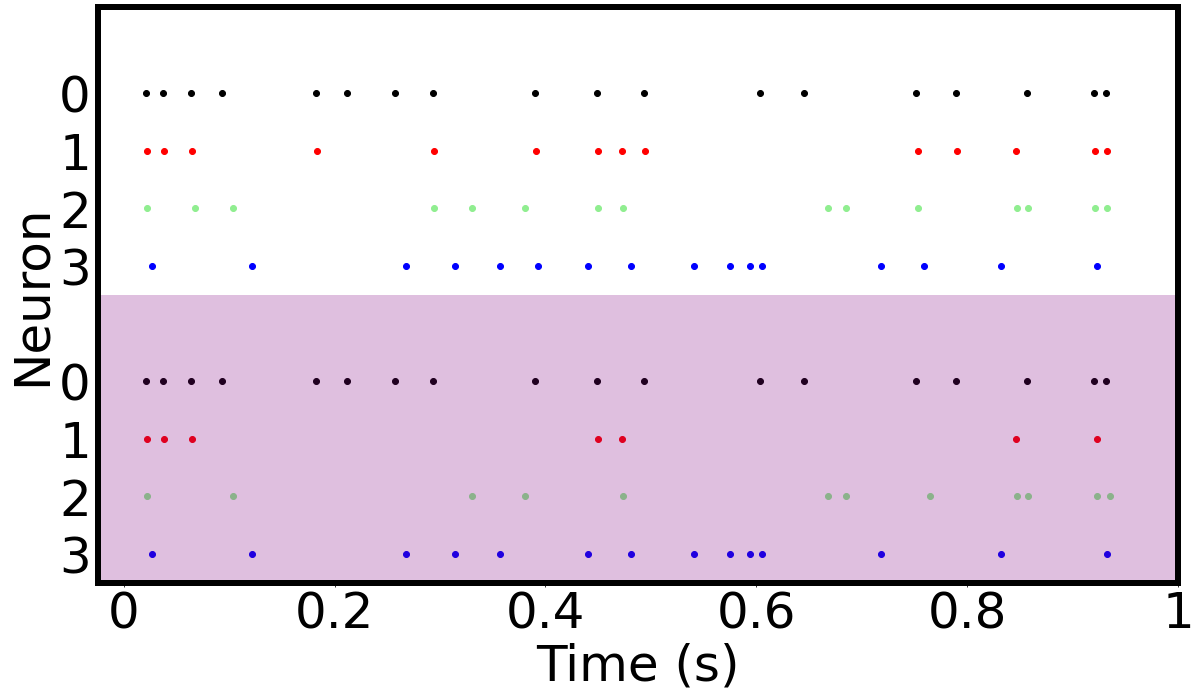

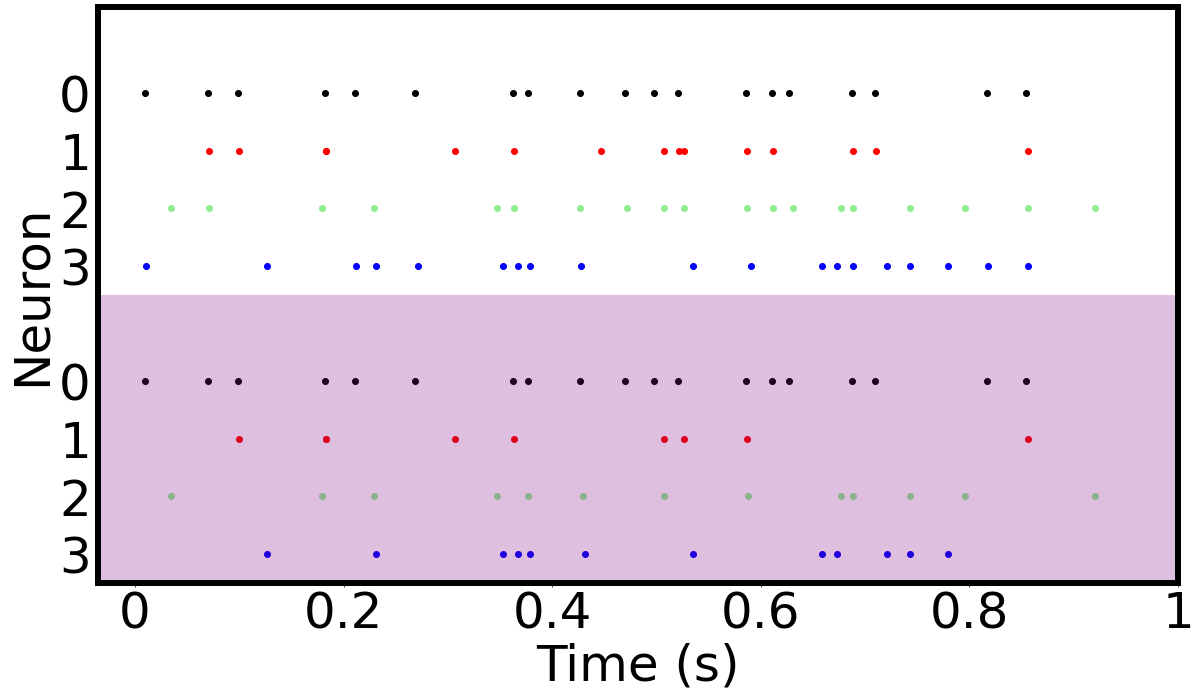

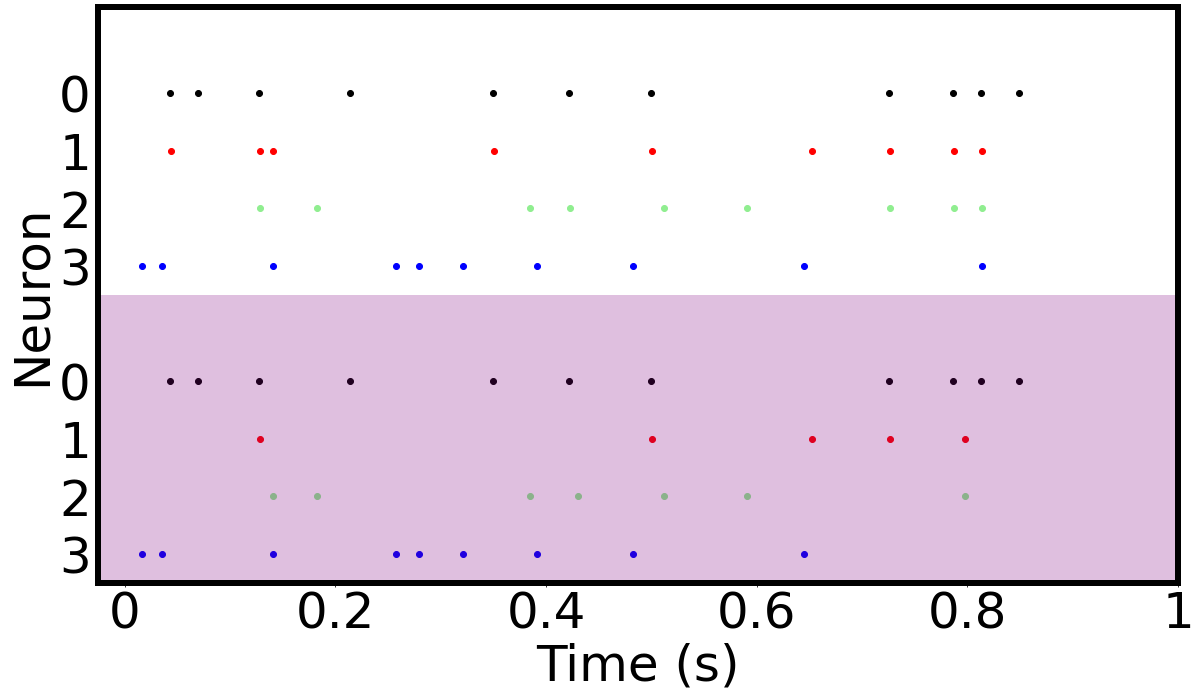

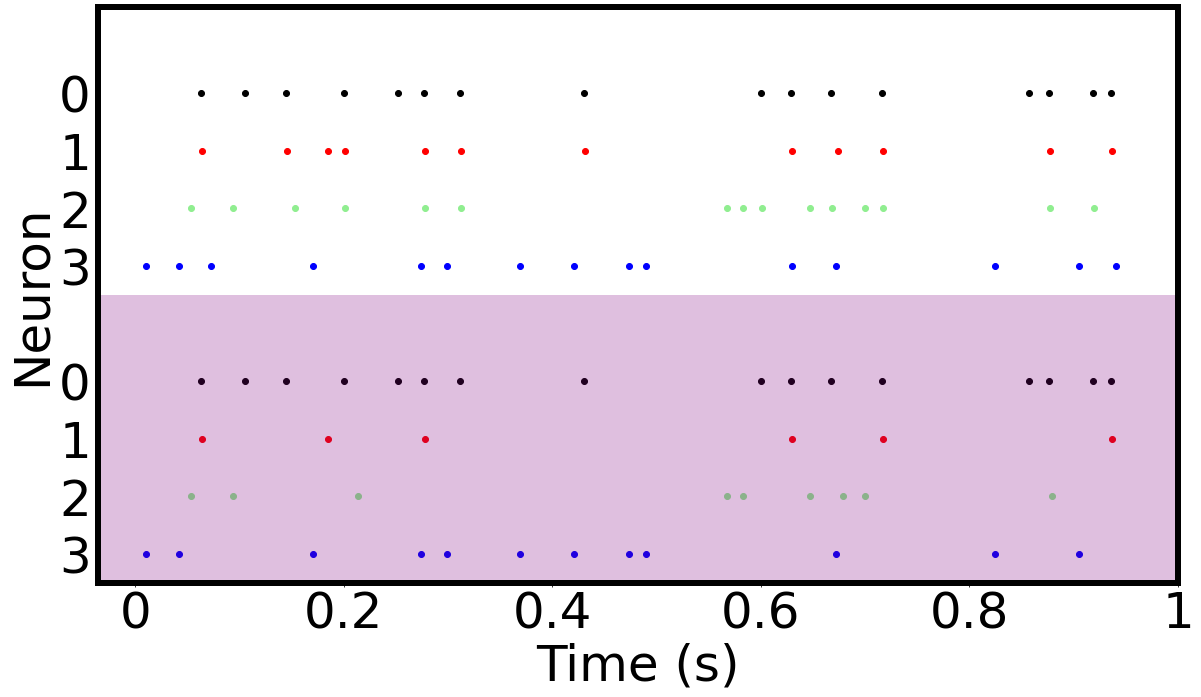

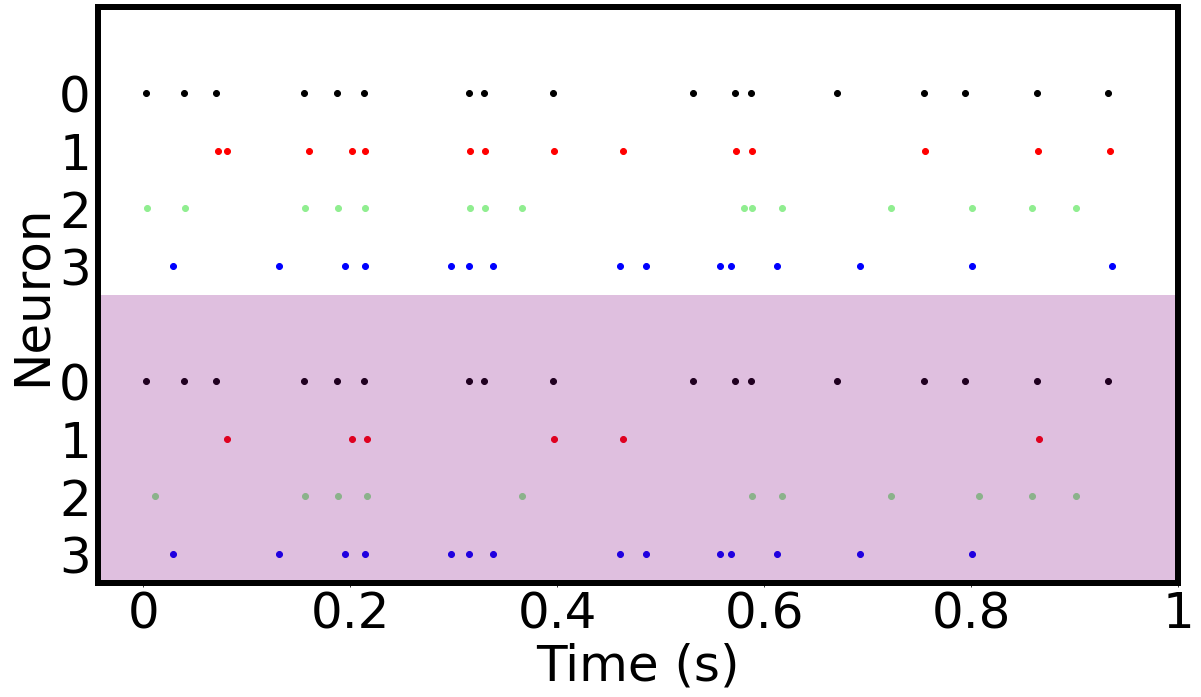

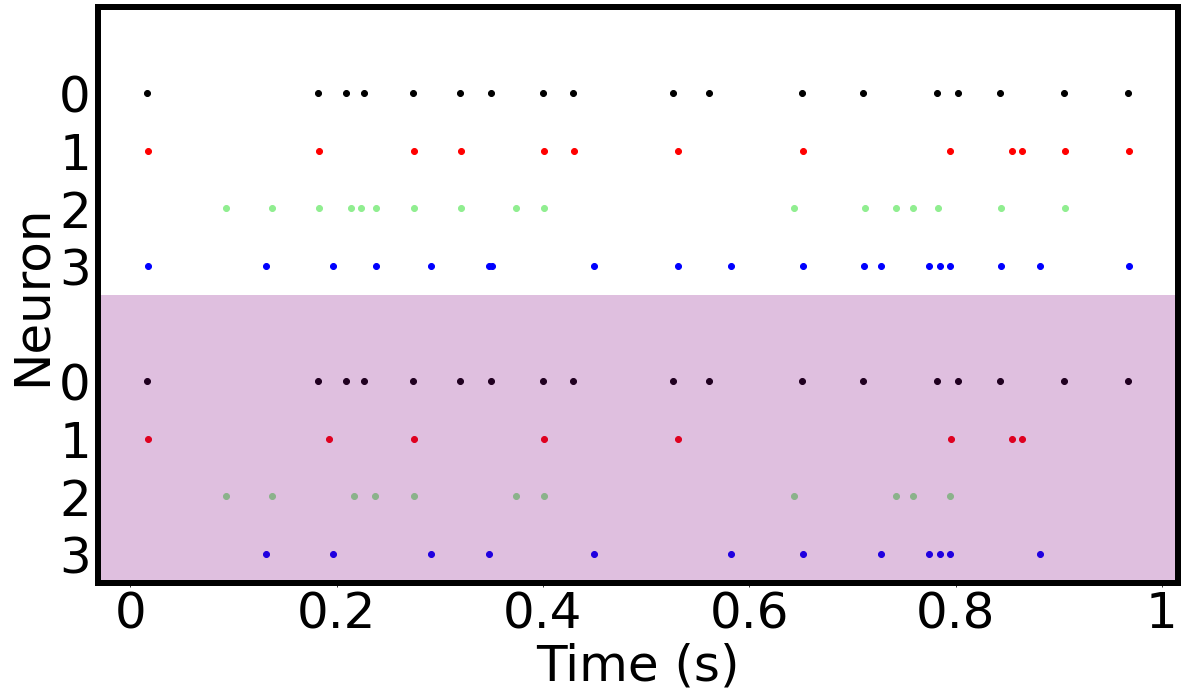

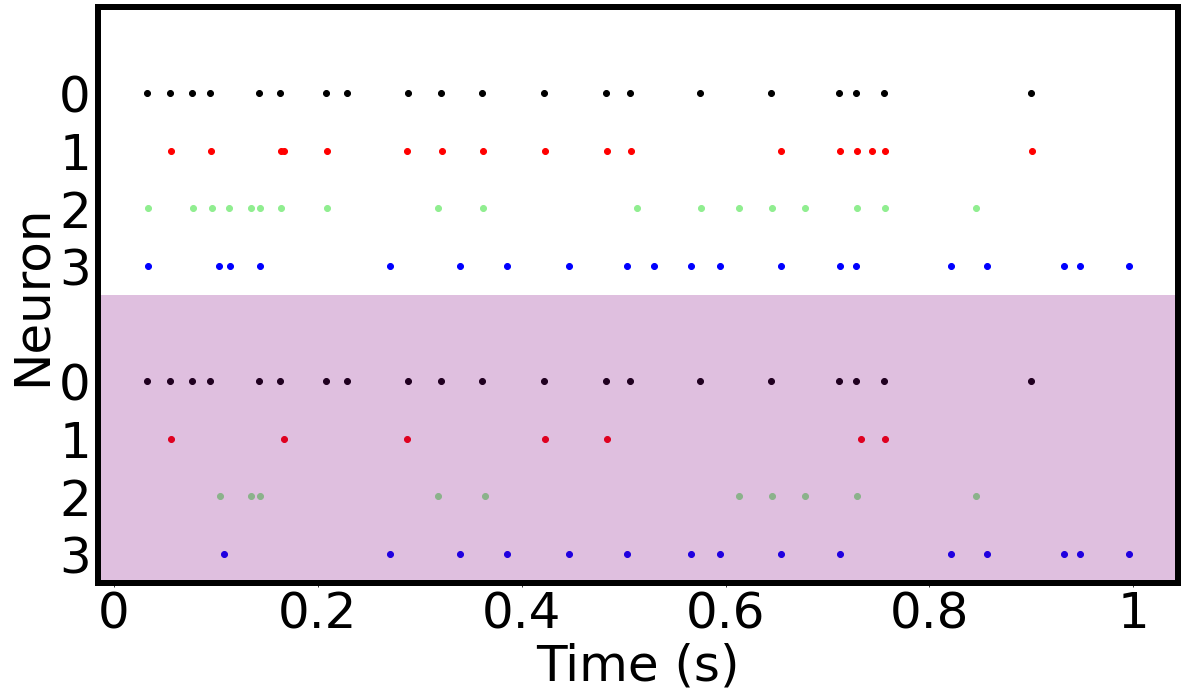

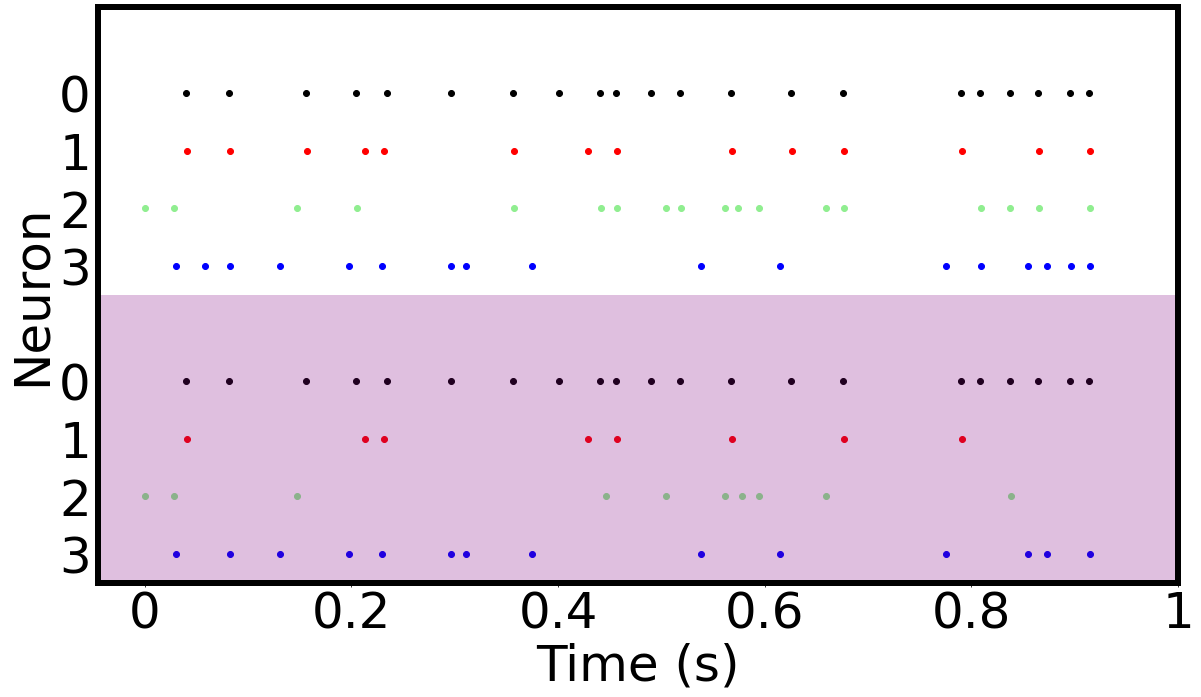

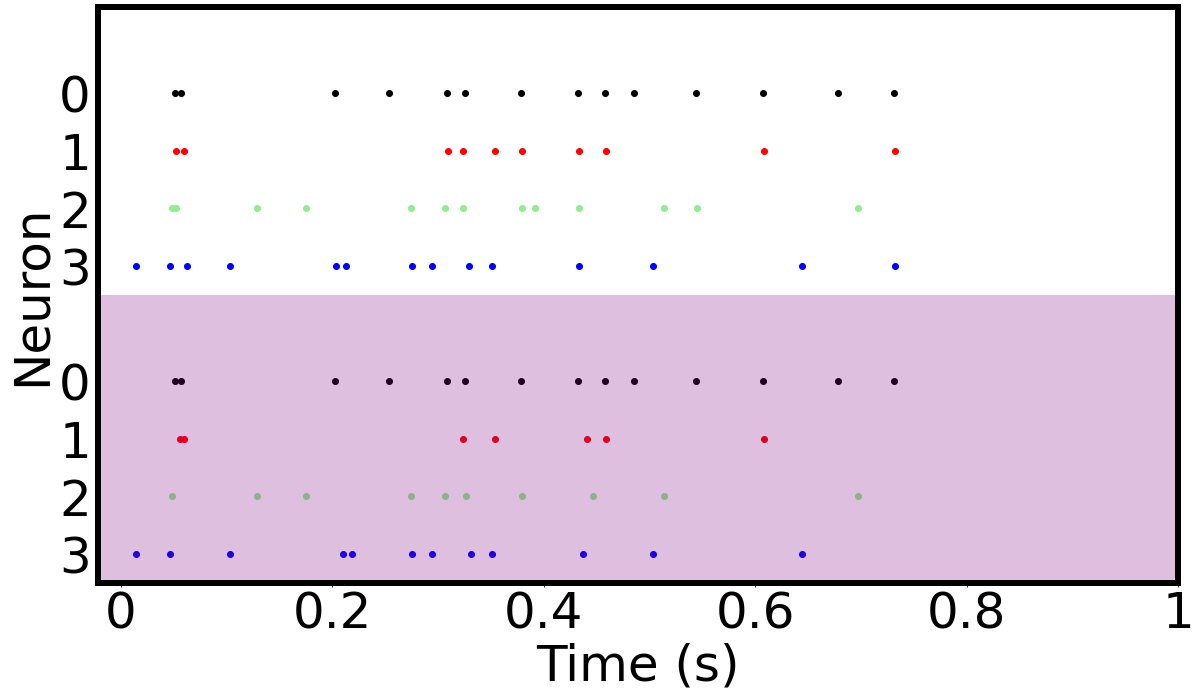

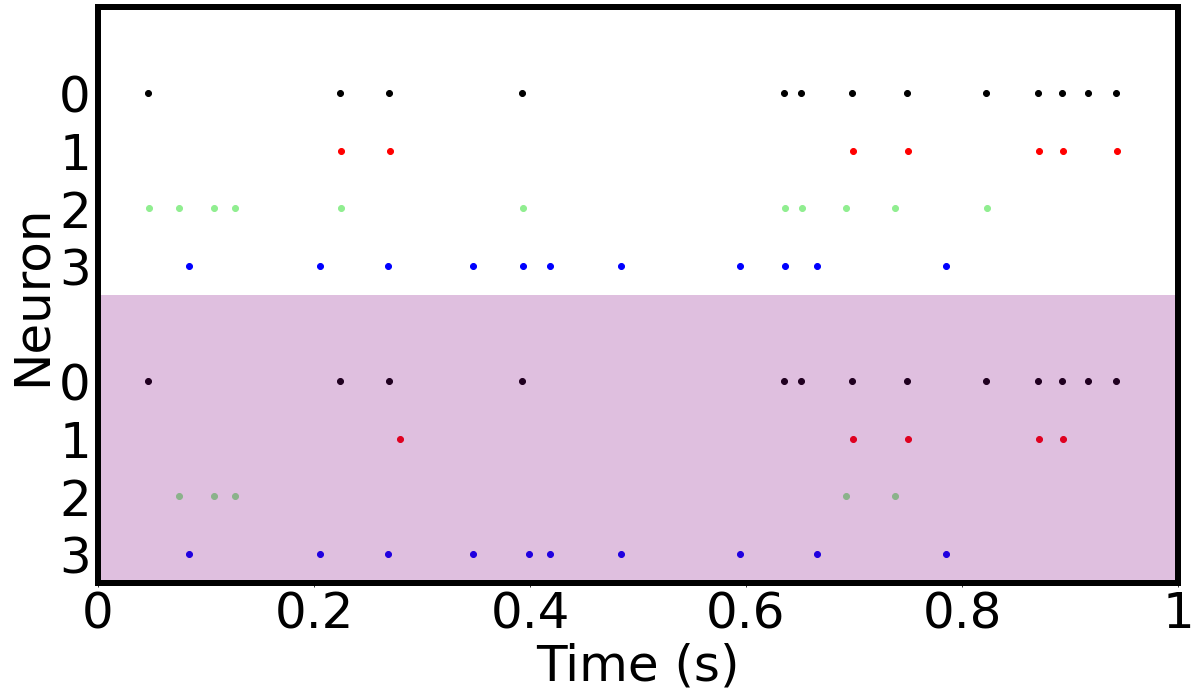

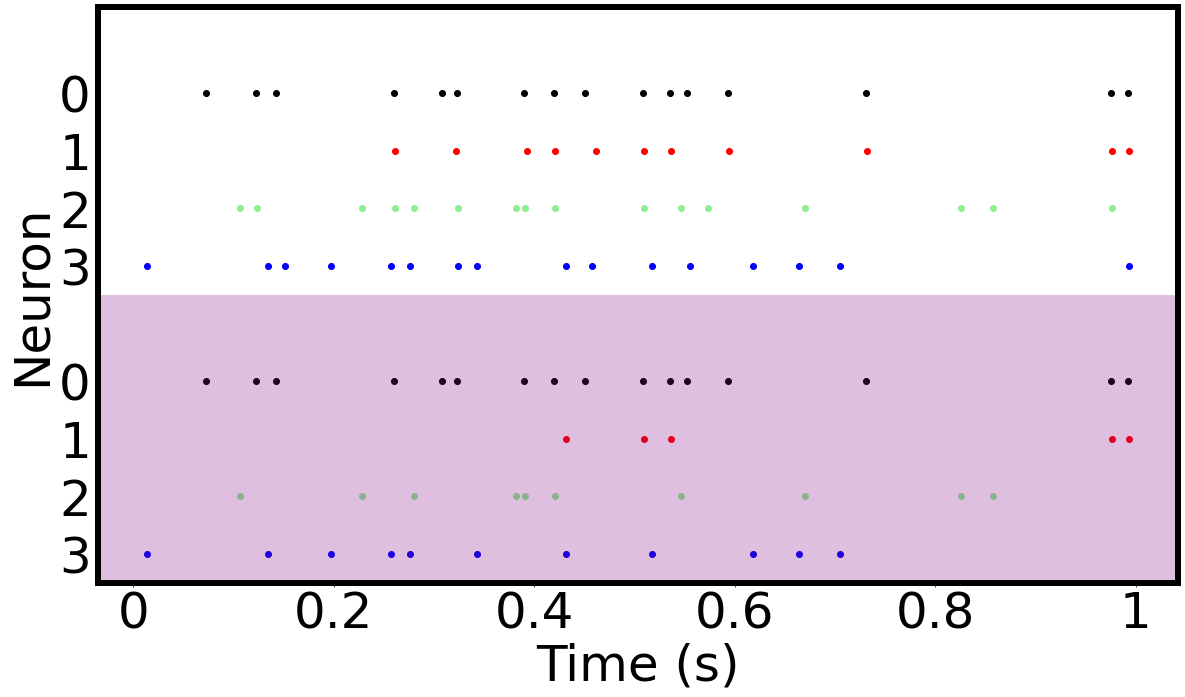

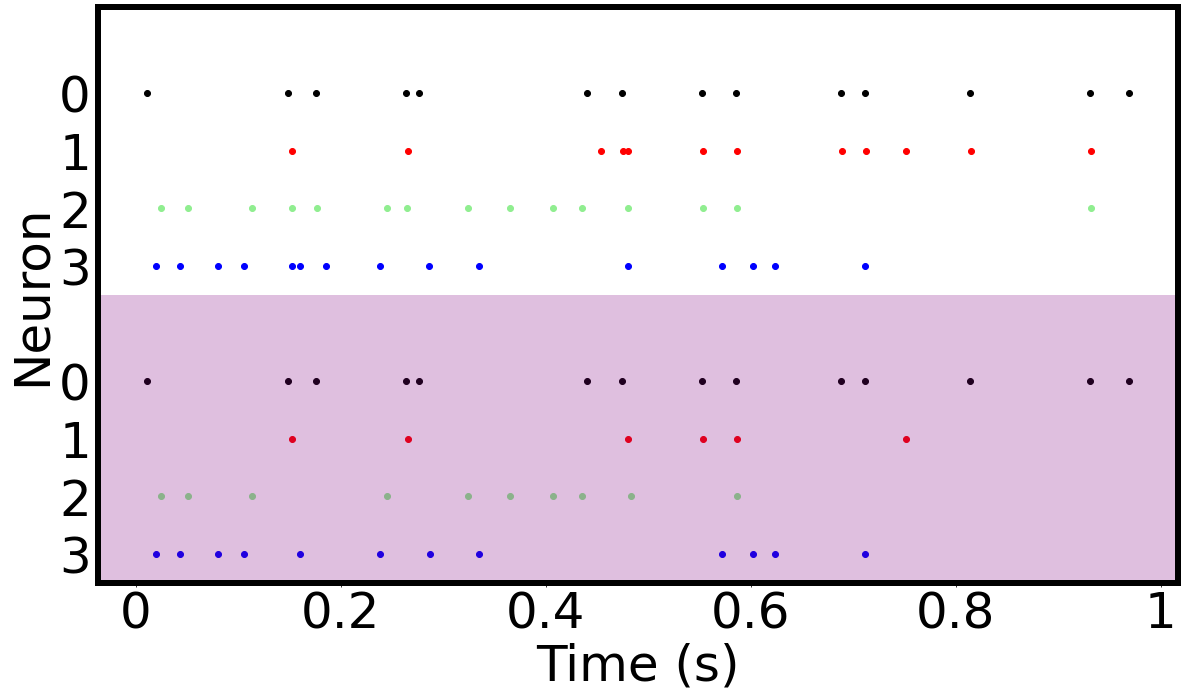

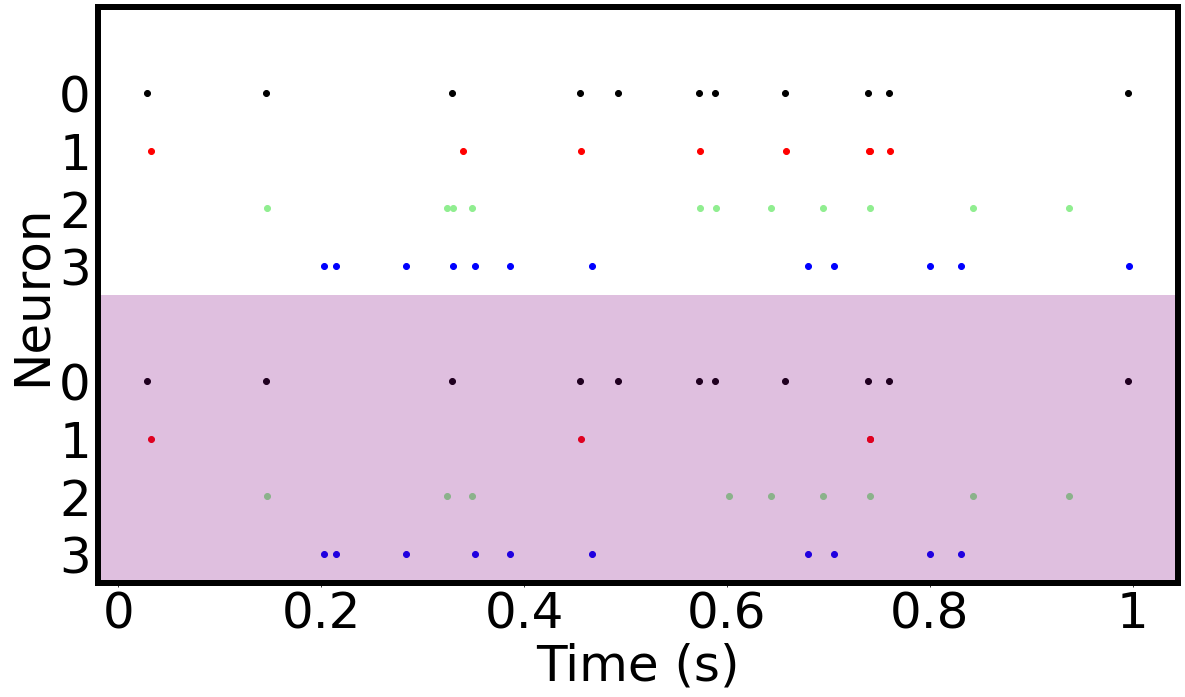

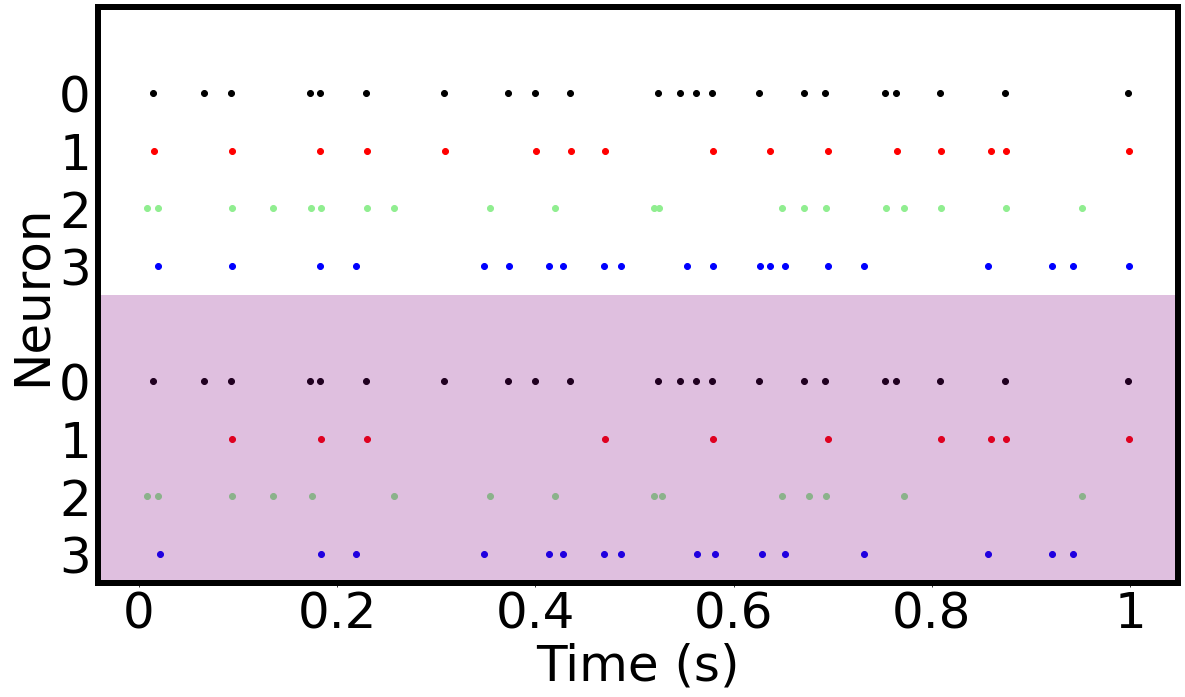

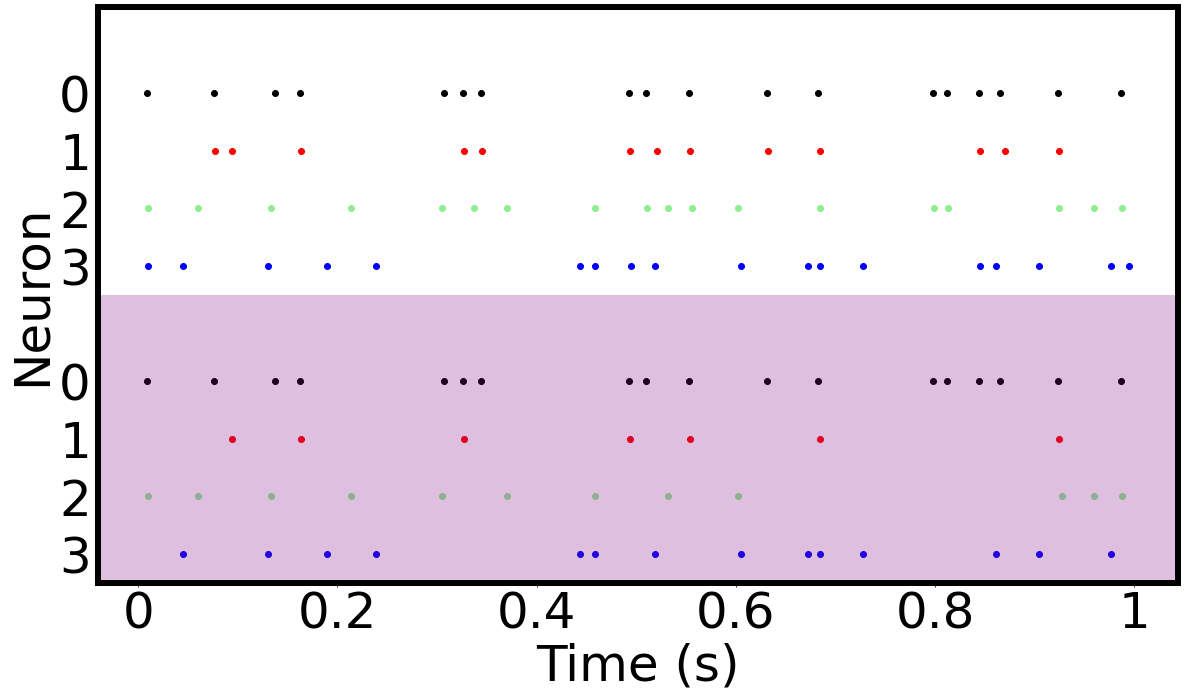

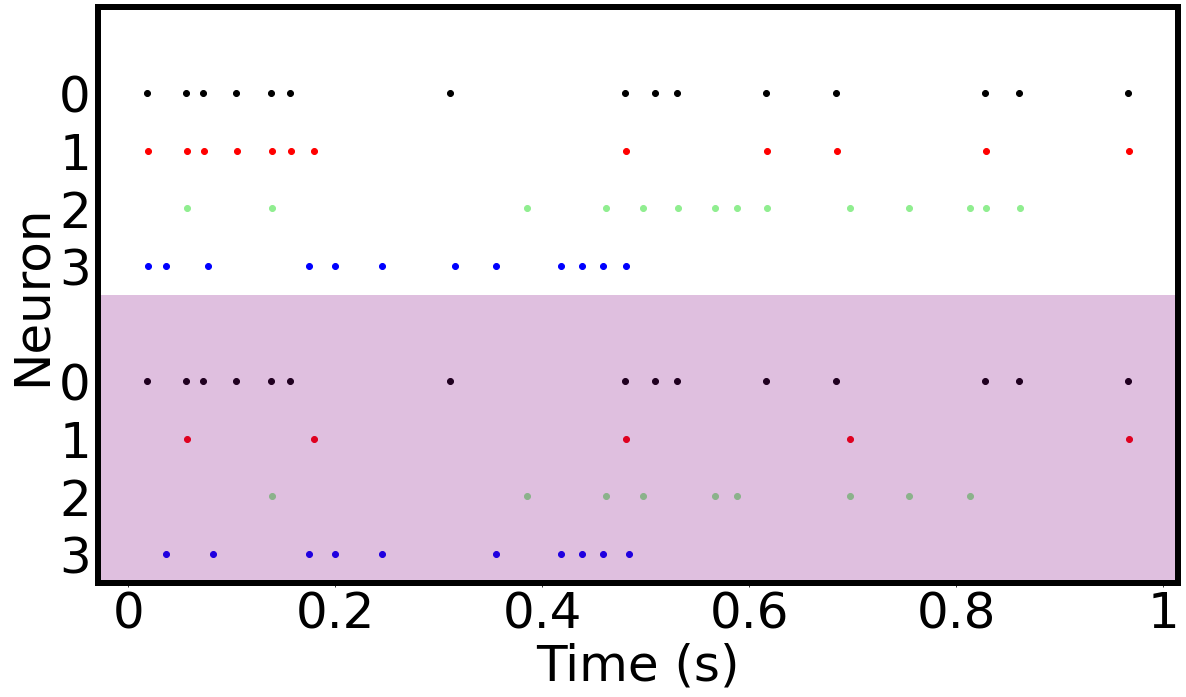

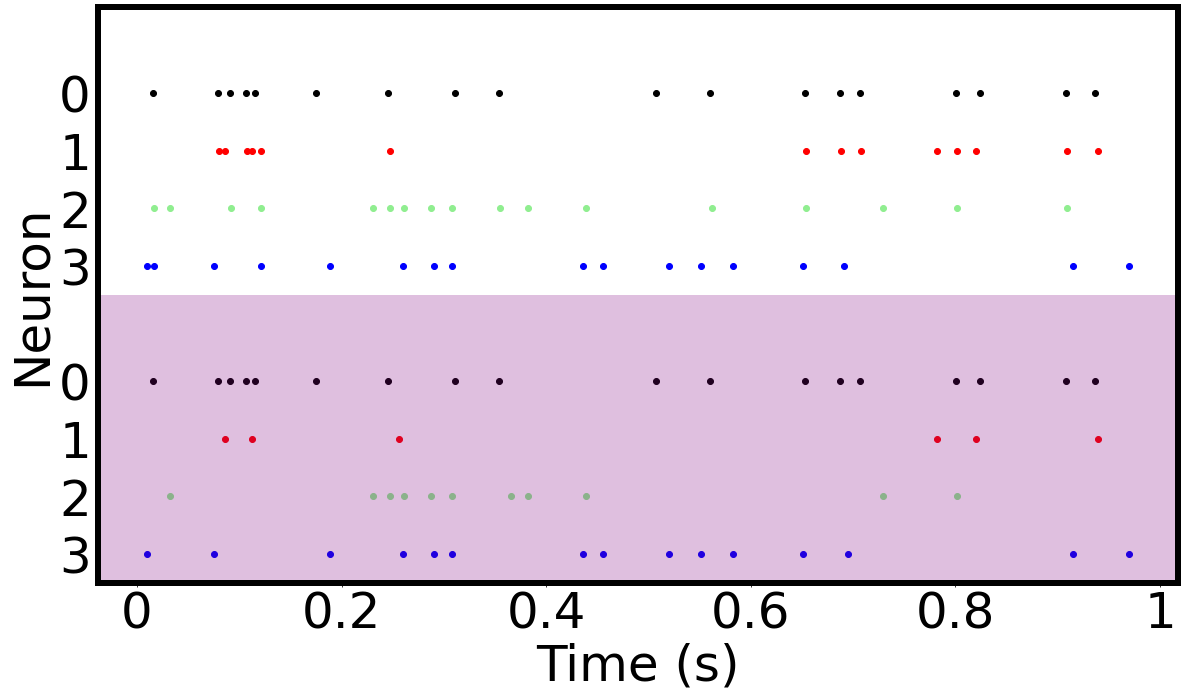

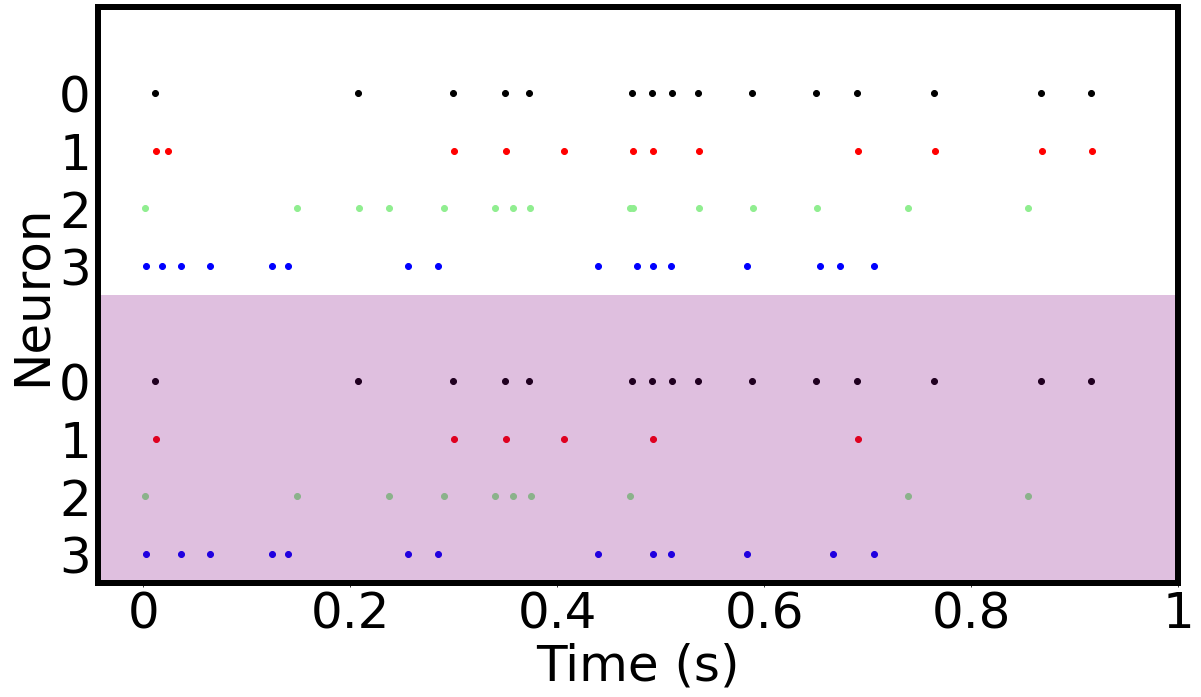

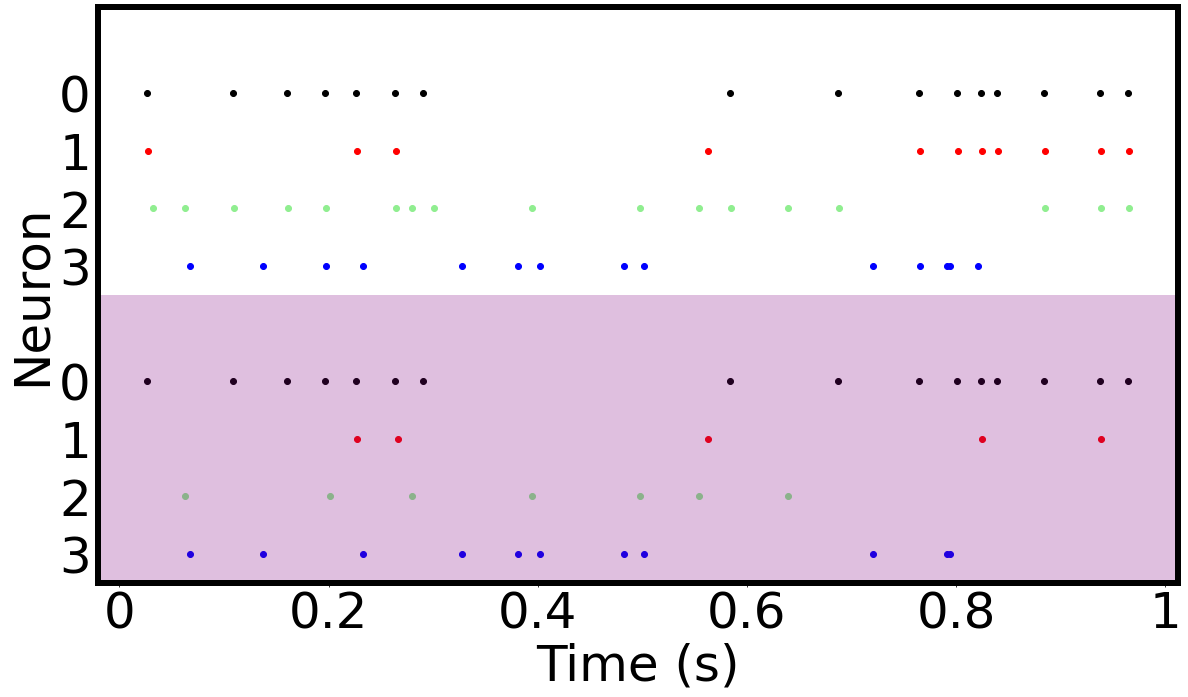

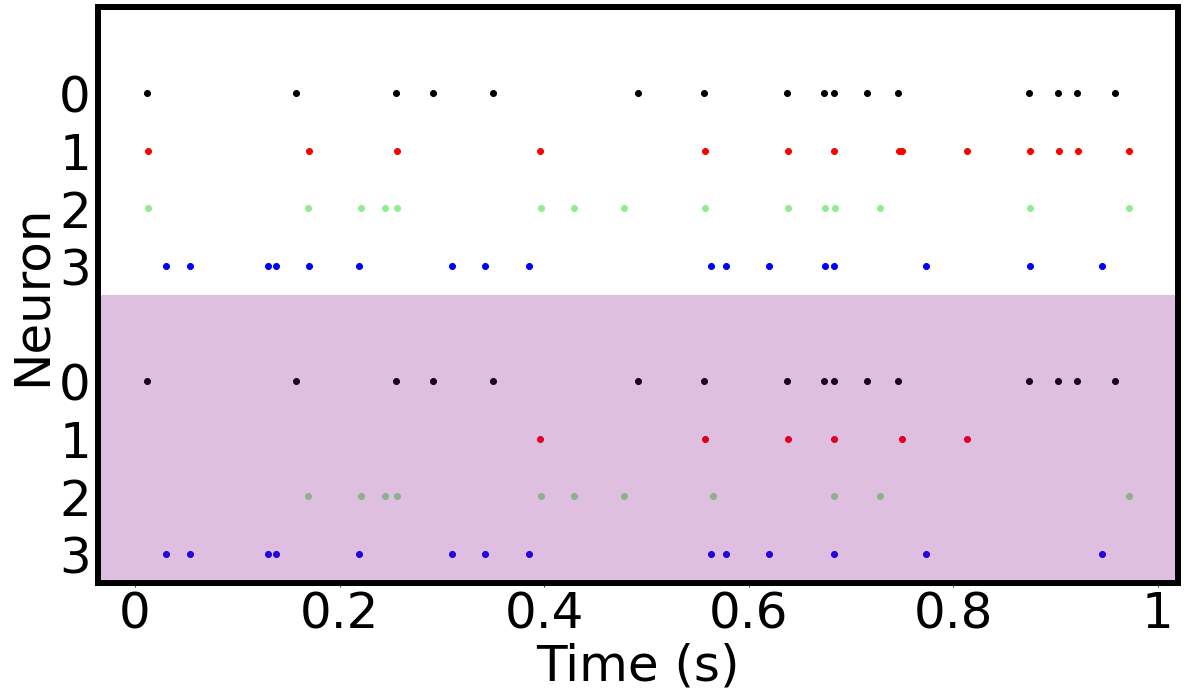

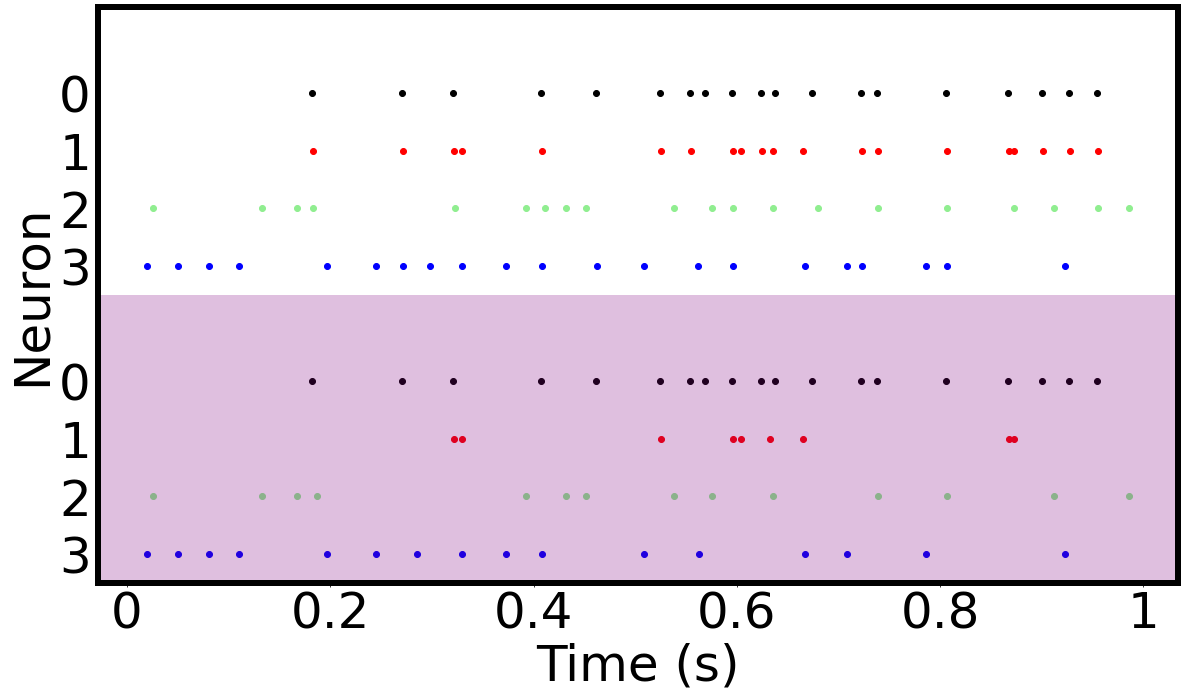

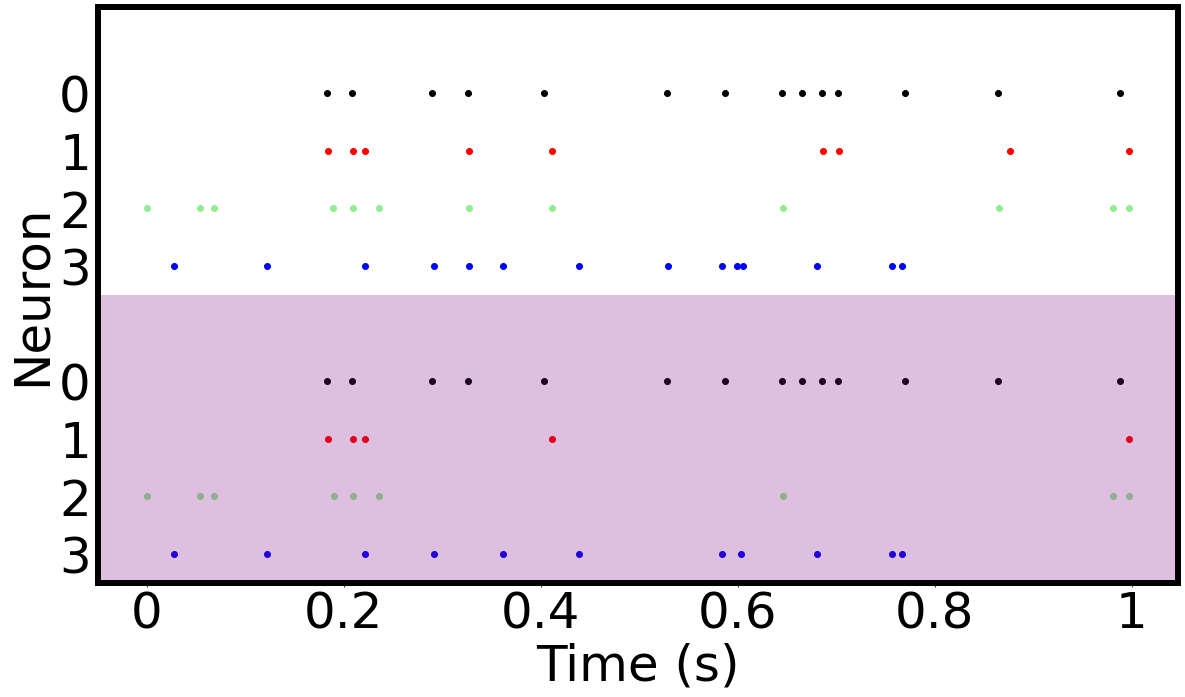

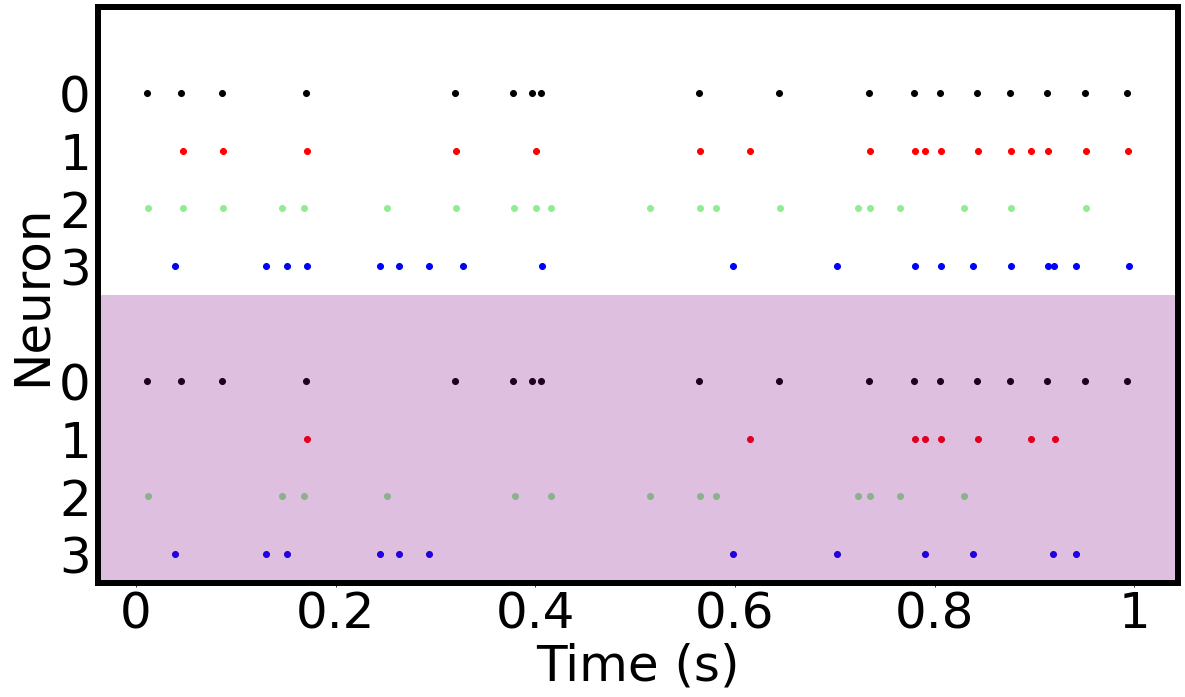

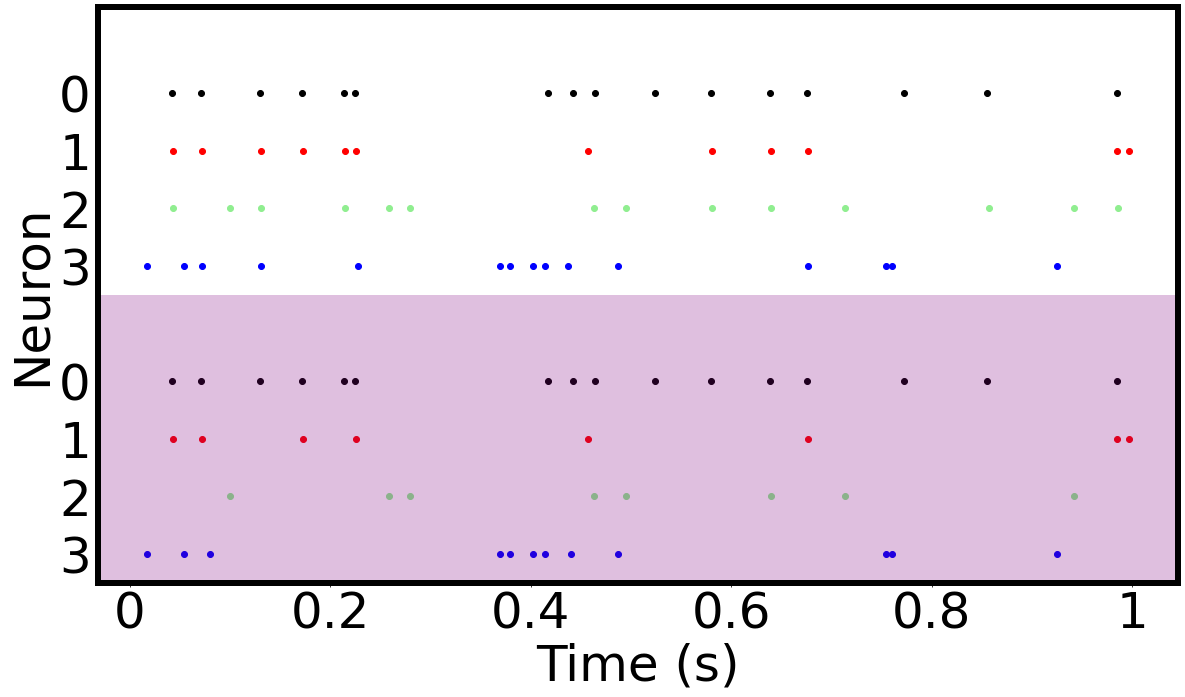

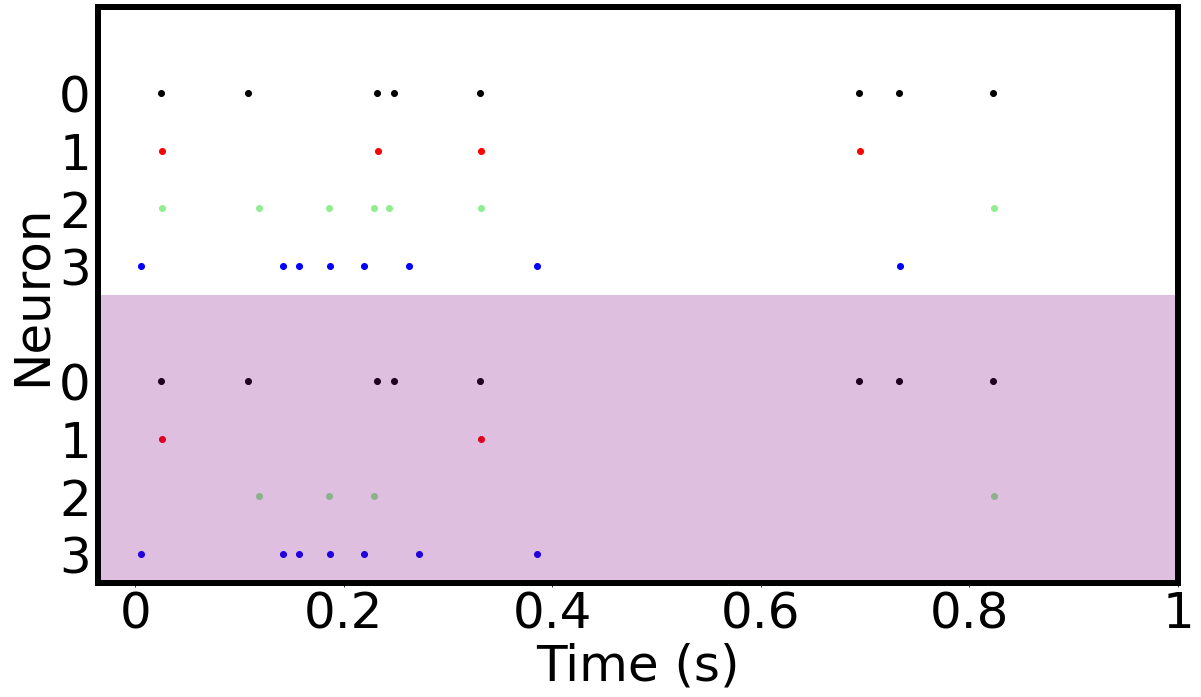

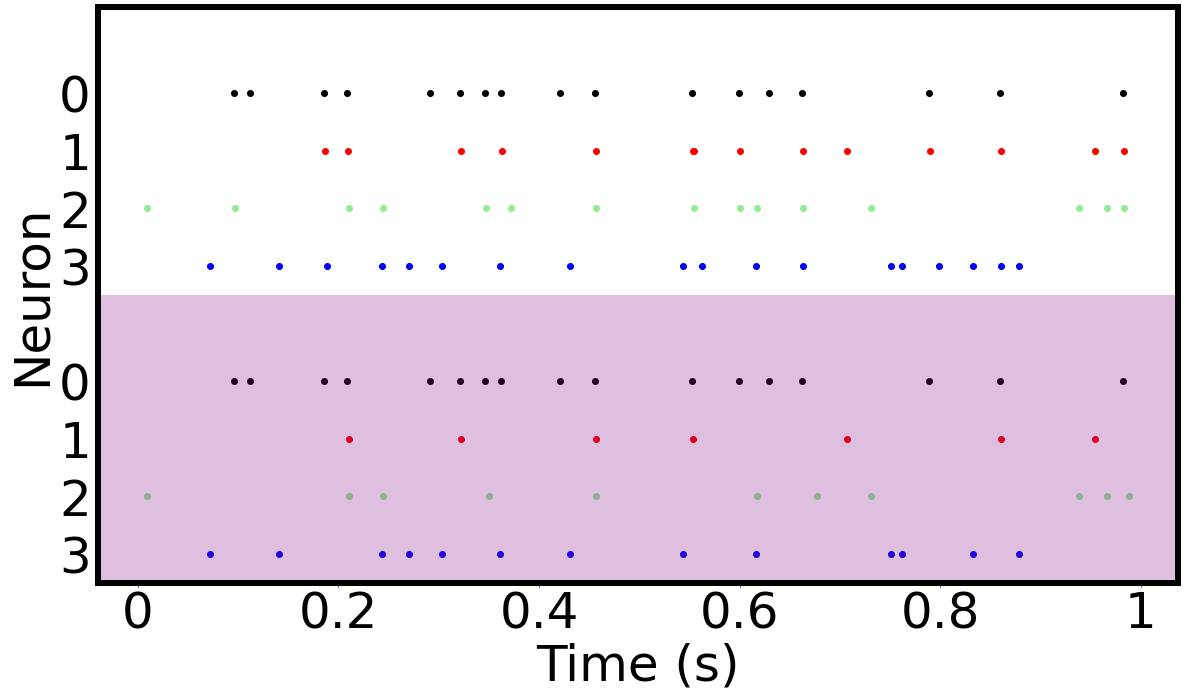

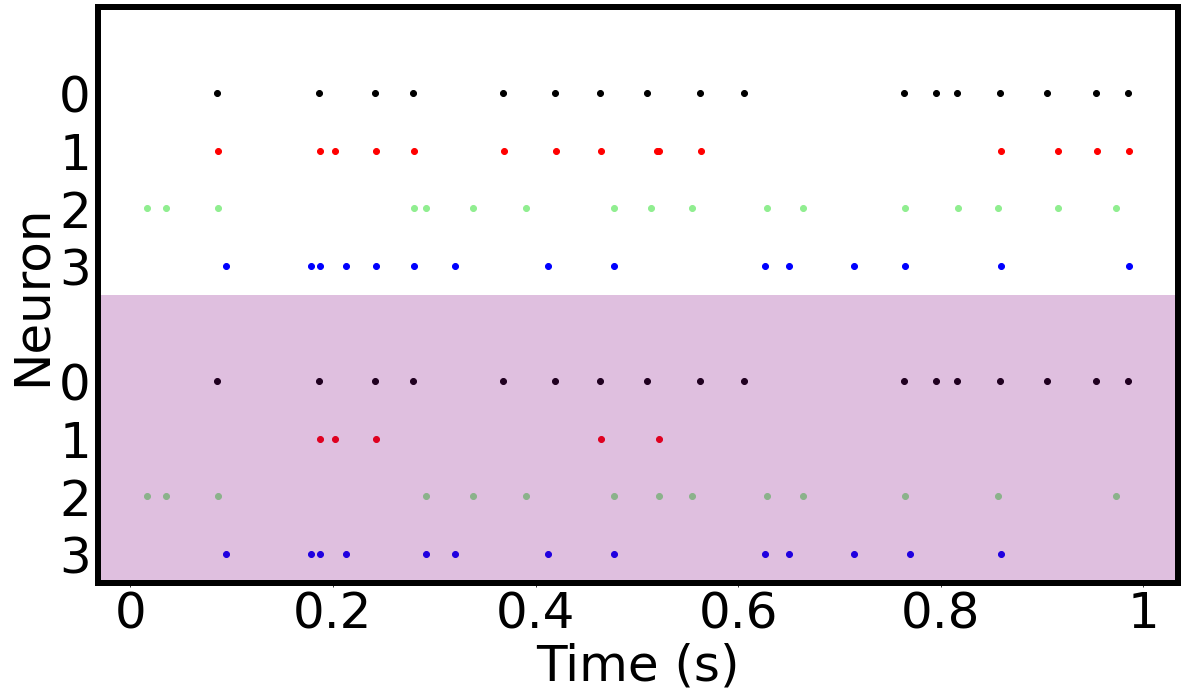

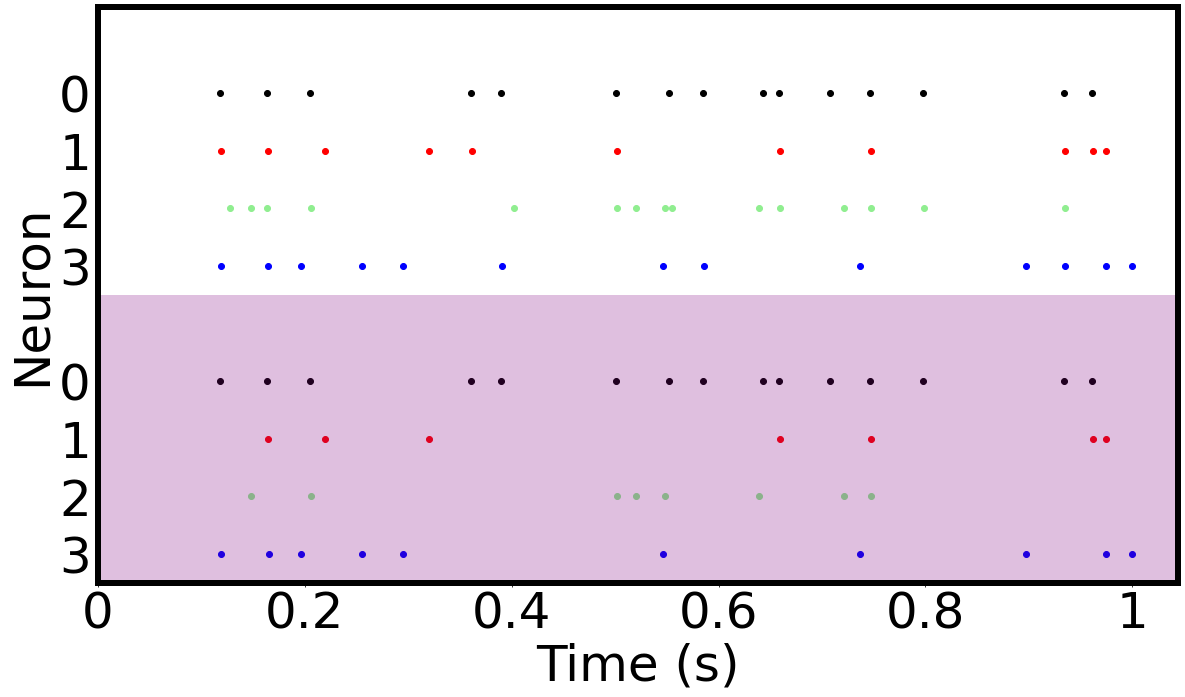

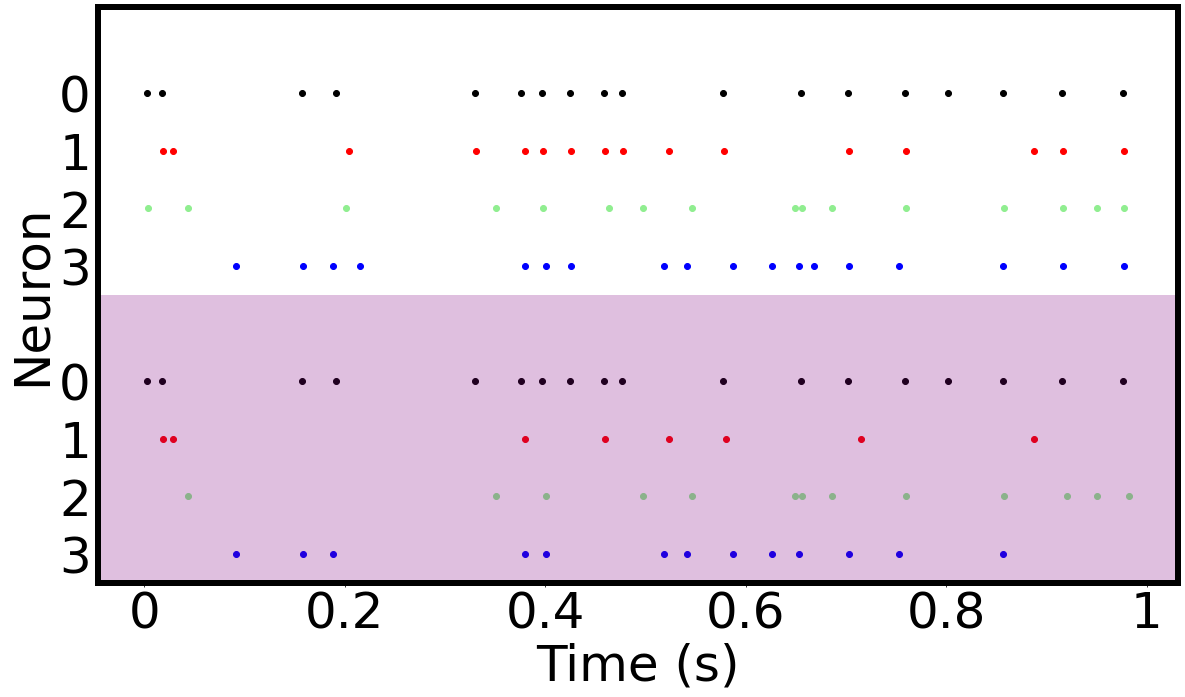

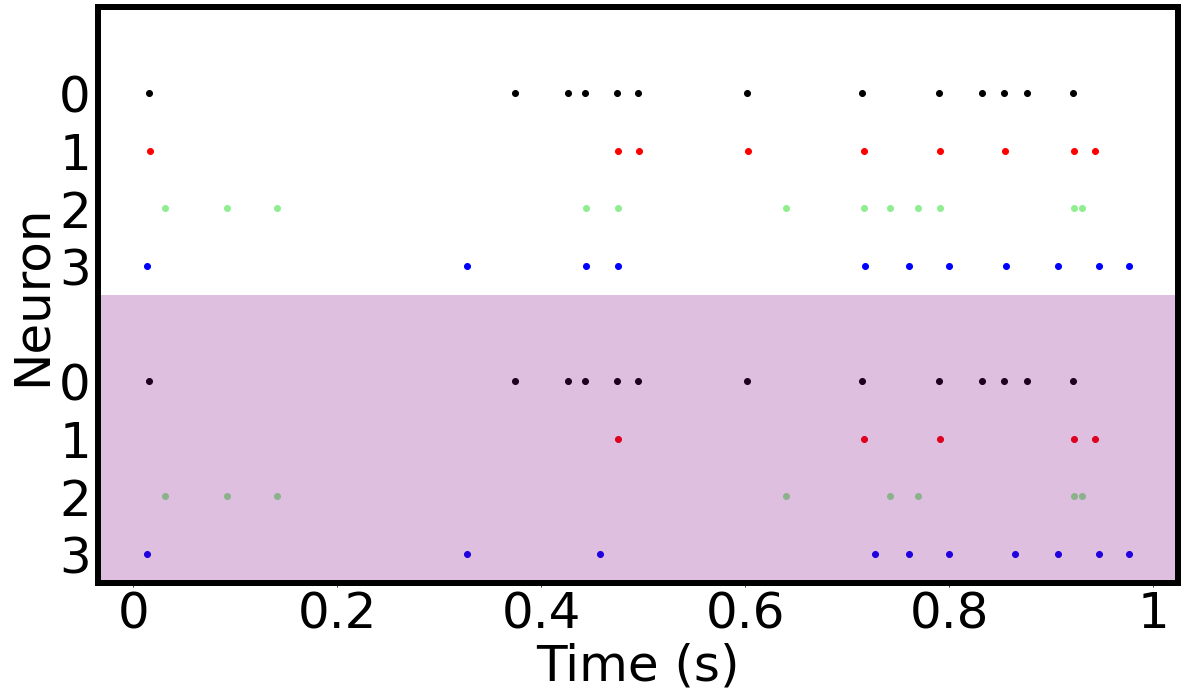

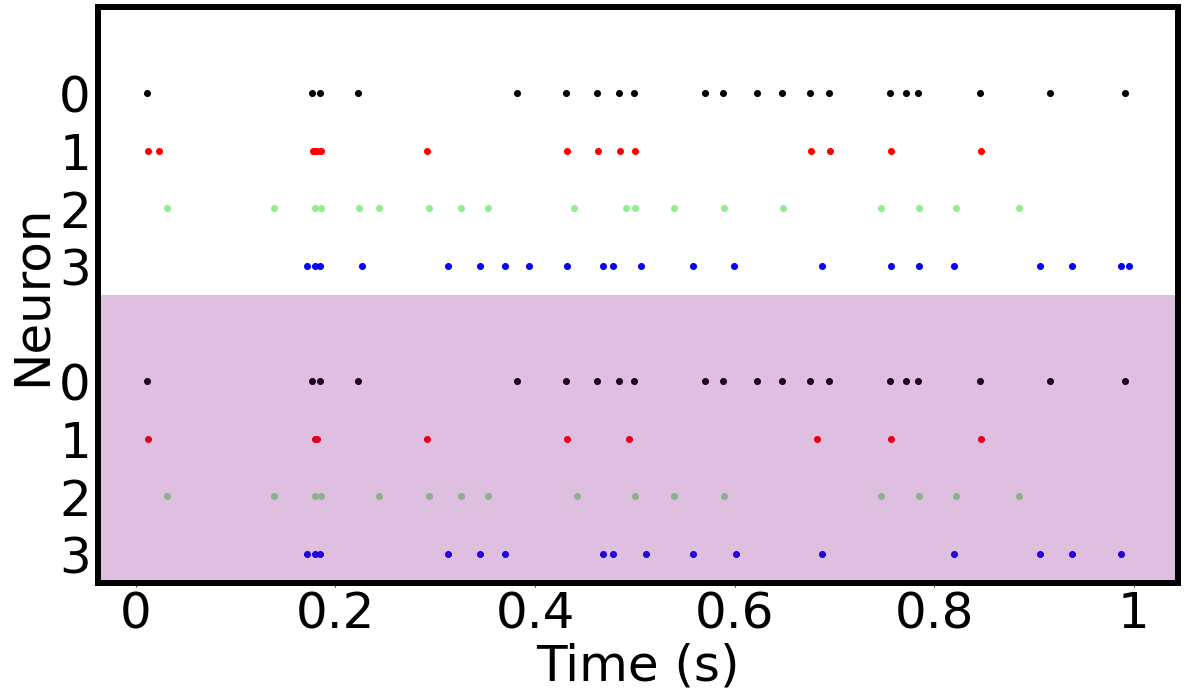

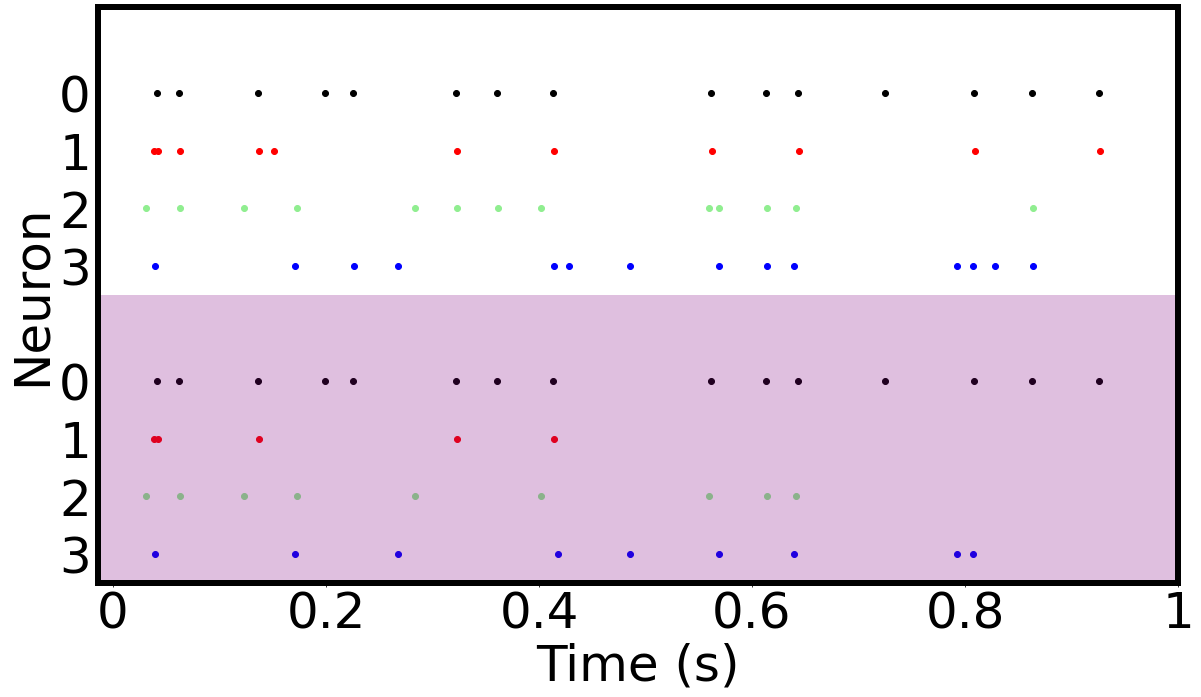

In [11]:
matplotlib.rc('xtick', labelsize=50) 
matplotlib.rc('ytick', labelsize=50) 

thresh = 10e6 
min_x = -0.01 
number_neurs = neur_x * neur_y * neur_z
space = number_neurs 
v = 0
once = True
for idex in range(len(spike_trains_y)):
    fig = plt.figure(idex,figsize=(15,8))
    ax = fig.add_axes([0,0,1,1])
    ax.set_ylim(ymax = space+0.5, ymin = -space-1.5)
    ax.set_ylabel("Neuron", fontsize = 50)
    ax.set_xlabel("Time (s)", fontsize = 50)
    c_neur = ["k", "r", "lightgreen", "b"]
    for i in range(len(no_inhib_y[idex])):
        ax.scatter(no_inhib_y[idex][i] / 1e6, np.abs(no_inhib_x[idex][i]-3), color = c_neur[no_inhib_x[idex][i]])
    plt.yticks(range(0,4))

    
    for i in range(len(spike_trains_y[idex])):
        ax.scatter(spike_trains_y[idex][i] / 1e6, np.abs(spike_trains_x[idex][i]-3) - number_neurs -1, color = c_neur[spike_trains_x[idex][i]])


    ax.set_yticks([-5, -4, -3, -2, 0, 1, 2, 3], [3, 2, 1, 0, 3, 2, 1, 0])
    ax.set_xticks([0, 0.2, 0.4, 0.6, 0.8, 1], ["0",  "0.2", "0.4", "0.6", "0.8", "1"])
    ax.axhspan(-space-1.5, -0.5, min_x, 4.2, facecolor='purple', alpha=0.25)
    ax.axhspan(-0.5, space, min_x, 4.2, facecolor='k', alpha=0)
    ax.spines["bottom"].set_linewidth(6) 
    ax.spines["left"].set_linewidth(6)   
    ax.spines["top"].set_linewidth(6)   
    ax.spines["right"].set_linewidth(6)   

    plt.show()

In [12]:
suppr = np.zeros((len(spike_trains_y),3), dtype=np.float64)
matplotlib.rc('xtick', labelsize=50) 
matplotlib.rc('ytick', labelsize=20) 
for idex in range(len(spike_trains_y)):
    for i in range(3):
        where_no = len(np.where(no_inhib_x[idex]==i+1)[0])
        where = len(np.where(spike_trains_x[idex]==i+1)[0])
        suppr[idex][i] = where_no - where
mean_suppr = np.mean(suppr, axis = 0)
mean_err = np.std(suppr, axis = 0) / np.sqrt(3)

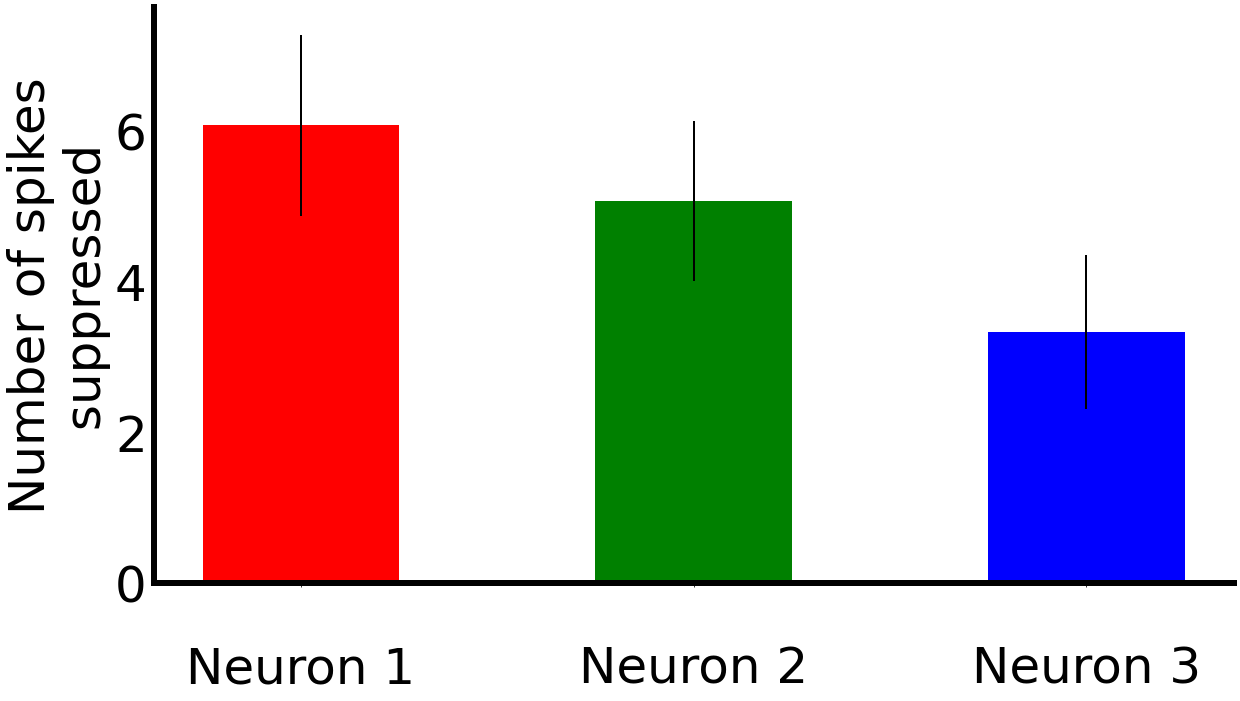

In [13]:
x = [5, 15, 25]
fig = plt.figure(0, figsize = (15, 8))
matplotlib.rc('xtick', labelsize=50) 
matplotlib.rc('ytick', labelsize=50) 
matplotlib.rcParams['legend.fontsize'] = 35
ax = fig.add_axes([0,0,1,1])
errbar = dict(lw=2, capsize=0, capthick=0)
c = ["red", "green", "blue"]
for i in range(3):
    ax.bar(x[i], mean_suppr[i], yerr = mean_err[i], error_kw=errbar, width=5, color = c[i], alpha = 1)

# ax.set_xlabel("Amount of inhibition (%)", fontsize = 70)
ax.set_ylabel("Number of spikes\n suppressed", fontsize = 50)
ax.spines["bottom"].set_linewidth(6) 
ax.spines["left"].set_linewidth(6)   

ax.spines[['right', 'top']].set_visible(False)
ax.set_xticks(x, ["\nNeuron 1", "\nNeuron 2", "\nNeuron 3"])

In [14]:
# gestures_simple = [[56.14, 55.43], [68.42, 68.42], [70.17, 69.47], [68.42, 68.77]]
gestures_simple = [[72.28, 68.42], [85.61, 85.26], [86.32, 83.51], [85.26, 85.26]]

mnist_simple = [[93.08, 93.53], [94.31, 94.29], [94.17, 94.46], [94.42, 94.59]]
mean_gest_simple = np.mean(gestures_simple,axis = 1)
err_gest_simple = np.std(gestures_simple,axis =1) / np.sqrt(2)
mean_mnist_simple = np.mean(mnist_simple,axis = 1)
err_mnist_simple = np.std(mnist_simple,axis = 1) / np.sqrt(2)
                   
# gestures_complex= [[50.87, 54.38], [69.82, 67.71], [68.77, 68.42], [71.22, 69.47] ]
gestures_complex= [[49.83, 55.09], [82.46, 82.11], [82.11, 82.81], [83.86, 82.11] ]

mnist_complex= [[82.96, 83.78], [90.81, 90.49], [91.55, 90.89], [91.82, 92.39]]
mean_gest_complex = np.mean(gestures_complex,axis = 1)
err_gest_complex = np.std(gestures_complex,axis = 1) / np.sqrt(2)
mean_mnist_complex = np.mean(mnist_complex,axis = 1)
err_mnist_complex = np.std(mnist_complex,axis = 1) / np.sqrt(2)

In [15]:
mean_gest_simple

array([70.35 , 85.435, 84.915, 85.26 ])